In [ ]:
# Extract data from text files and put them into dataframe with labels
import pandas as pd
import re
import matplotlib.pyplot as plt


find_text_pattern = r"^(.*?)(?:@positive|@negative|@neutral)$"
find_label_pattern = r"@(positive|negative|neutral)$"



def convertToDF():
    
    df = pd.DataFrame(columns=['text', 'sentiment'])


    for txt_file in ('Sentences_50Agree.txt', 'Sentences_66Agree.txt', 'Sentences_75Agree.txt', 'Sentences_AllAgree.txt'):
        with open(f'../data/FinancialPhraseBank-v1.0/{txt_file}', 'r', encoding='latin-1') as data_txt:
            for line in data_txt: 
                match = re.match(find_text_pattern, line)
                
                
                if match:
                    text = match.group(1).strip()
                    label = re.search(find_label_pattern, line).group(1)
                    
                    
                    new_row = pd.DataFrame({'text': [text], 'sentiment': [label]})
                    df = pd.concat([df, new_row], ignore_index=True)

    print(df.head())
    df.to_csv('../data/csv/labeled_sentiments.csv')
    df.to_parquet('../data/parquet/labeled_sentiments.parquet', engine='fastparquet')

convertToDF()

In [ ]:

# Calculate the number of words for each entry
df = pd.read_parquet('../data/parquet/labeled_sentiments.parquet')

df['length'] = df['text'].str.split().str.len()
df['length'].describe() 

count    14780.000000
mean        22.896549
std         10.037560
min          2.000000
25%         15.000000
50%         21.000000
75%         29.000000
max         81.000000
Name: length, dtype: float64

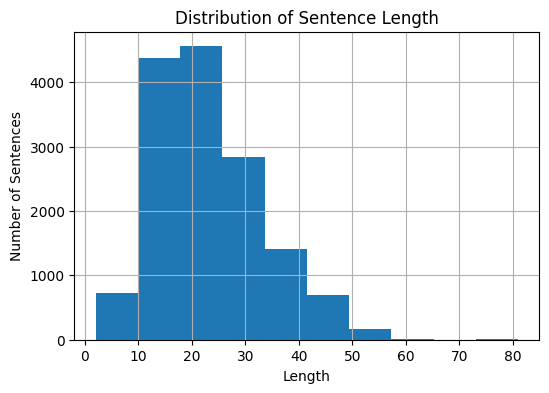

In [ ]:
df.hist(column='length', figsize=(6,4), bins=10)
plt.title('Distribution of Sentence Length')
plt.xlabel('Length')
plt.ylabel('Number of Sentences')

plt.savefig('../plots/SentenceLengthDistribution.png')
plt.show()

# Sentence Length Analysis

The sentences have a mean length of about 22, and there is no sentence above 85 words. Since these sentences are relatively short, they are suitable for training a conventional ML model or small deep learning model.

In [5]:
# Check how often our tickers are mentioned in our training data
import re

tickers = ["AAPL","TSLA","GOOG","NVDA"]
for t in tickers:
    df[t+"_mention"] = df['text'].str.contains(fr"\b{t}\b", case=False, na=False)

df[[t+"_mention" for t in tickers]].sum()
# Barely mentioned at all, which is ok, because the model just has to differentiate between bad sentiment sentences and good ones!

AAPL_mention    0
TSLA_mention    0
GOOG_mention    1
NVDA_mention    0
dtype: int64

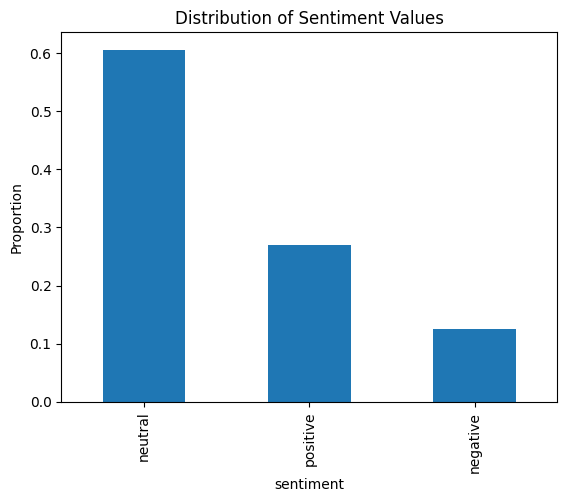

In [ ]:
# Get distribution of positive, negative, and neutral sentiments

value_counts = df['sentiment'].value_counts(normalize=True)

value_counts.plot(kind='bar')
plt.title('Distribution of Sentiment Values')
plt.ylabel('Proportion')
plt.savefig('../plots/SentimentDisribution.png', dpi=300)
plt.show()
# Far more neutrals than positives or negatives, but we will weigh the classes according to their proportion

In [15]:
df = df.drop([f'{t}_mention' for t in ('AAPL', 'NVDA', 'GOOG', 'TSLA')], axis=1)

In [ ]:
df.to_csv('../data/csv/labeled_sentiments.csv')
df.to_parquet('data/parquet/labeled_sentiments.parquet', engine='fastparquet')